
# <center>Projet ADEME - Groupe 9</center>


### Table of Contents

* [1) Présentation du groupe](#présentation-du-groupe)
* [2) Introduction](#introduction)
    * [2.1) Contexte et Problème](#contexte-et-problème)
    * [2.2) Reformulation formelle du problème](#reformulation-formelle-du-problème)
    * [2.3)  Propriétés théoriques et complexité](#propriétés-théoriques-et-complexité) 
* [3) Choix des algorithmes](#choix-des-algorithmes)
    * [3.1) Algorithme de colonies de fourmis](#colonie-de-fourmis)
* [??) Conclusion](#conclusion)
* [??) Bibliographie](#bibliographie)

### 1) Présentation du groupe <a class="anchor" id="présentation-du-groupe"></a>

* Alexandre Eberle
* Tanguy Gackel
* Hugo Kretz
* Anna Steinmetz (chef de projet)



### 2) Introduction <a class="anchor" id="introduction"></a>

#### 2.1) Contexte et Problème : <a class="anchor" id="contexte-et-problème"></a>


##### Contexte :  


 L'ADEME a lancé un appel à manifestation d'intérêt pour développer de nouvelles solutions de mobilité adaptées à différents territoires. On fait partie de l'équipe de CesiCDP chargée de répondre à cet appel en proposant une méthode de gestion de tournées de livraison visant à minimiser la durée totale du trajet.



##### Problème :  

Cette tournée de livraison doit répondre à certaines contraintes. Il faut que le camion de livraison revienne à son point de départ. D’autres contraintes peuvent être ajouté, comme la gestion d’une fenêtre de livraison, la gestion de plusieurs camions en même temps, ou des variations de temps de parcours des arêtes.



#### 2.2) Reformulation formelle du problème : <a class="anchor" id="reformulation-formelle-du-problème"></a>
  
Les problèmes d'optimisation des itinéraires tels que le VRP (Vehicle Routing Problem) et le TSP (Traveling Salesman Problem) jouent un rôle important dans l'amélioration de l'efficacité des déplacements et de la planification des tournées. Ces problèmes permettent de réduire les coûts, d'optimiser les ressources et de planifier des trajets optimaux. En comprenant les défis associés aux tournées de vente et à la planification des trajets, ainsi qu'en utilisant des méthodes d'optimisation appropriées, il est possible de résoudre ces problèmes de manière efficace.


##### Traveling Salesman Problem (TSP) : 

Le TSP, également connu sous le nom de problème du voyageur de commerce, est l'un des problèmes d'optimisation combinatoire les plus étudiés dans le domaine de la recherche opérationnelle.

Ce problème pose la question de trouver un parcours qui commence et se termine à un nœud de base donné, en visitant chaque nœud de l'ensemble exactement une fois, tout en minimisant la distance totale parcourue. La résolution du problème TSP revêt une grande importance car il est classé parmi les problèmes NP-complets, ce qui signifie qu'il est difficile à résoudre efficacement pour les grandes instances.

Exemple :




##### Vehicle Routing Problem (VRP) : 

Le Vehicle Routing Problem (VRP), également connu sous le nom de problème de construction de tournées de véhicules, est une extension du célèbre problème du voyageur de commerce, appelé Travelling Salesman Problem (TSP). C'est un défi d'optimisation logistique qui implique la planification efficace des itinéraires de plusieurs véhicules pour la livraison de clients, tout en minimisant les coûts totaux ou la distance parcourue.

La principale difficulté du VRP réside dans la détermination des meilleurs itinéraires pour chaque véhicule, en tenant compte de contraintes spécifiques telles que les fenêtres de temps des clients. Ces fenêtres de temps définissent des plages horaires durant lesquelles les livraisons doivent être effectuées, ajoutant ainsi une contrainte temporelle à la planification des itinéraires.


##### Définition du problème formel : 

 Soit G = (V, E), un graphe connexe.
 
 - V = les arrêtes entre les villes
 - E = les noeuds (qui correspond aux villes)
 
 **Paramètres :**
 
\begin{equation}
    I{} = l \ 'ensemble \ des \ villes \\
\end{equation}

\begin{equation}
    K{} = l \ 'ensemble \ des \ véhicules \\
\end{equation}

\begin{equation}
    c_{ij} = la \ distance \ du \ trajet \ entre \ villes \ i \ et \ ville \ j \\
\end{equation}

\begin{equation}
    d_{i} = la \ demande \ du \ client \ i \\
\end{equation}

\begin{equation}
    q_{k} = la \ capacité \ du \ véhicule \ k \\
\end{equation}
 
\begin{equation}
    x_{ijk} = Indique \ 1 \ si \ le \ véhicule \ k \ viste \ la \ ville \ j \ depuis \ la \ ville \ i \ ou \ 0 \ sinon \\
\end{equation}

\begin{equation}
    x_{ijk} = 0 \\
\end{equation}

**Objective function**

Minimize Z

\begin{equation}
    Z = \sum_{i \in I} \sum_{j \in I} \sum_{k \in K}  c_{ij}*x_{ijk} \\
\end{equation}

**Contraintes**

Contrainte 1

La contrainte 1, assure que chaque noeud est entré une fois par un véhicule.

\begin{equation} 
\sum_{i \in I } \enspace \sum_{k \in K } x_{ijk} = 1 \qquad \forall _{j \in I \setminus 1} 
\end{equation}


Contrainte 2

La contrainte 2, assure la sortie de chaque vehicule est le point depuis il entre...

\begin{equation} 
\sum_{i \in I } x_{ijk} = \sum_{i \in I } x_{jik} \qquad \forall _{j \in I } \quad \forall _{k \in K} 
\end{equation}

Contraite 3

La contrainte 3 Chaque véhicule quitte le dépôt

\begin{equation} 
\sum_{j \in I \setminus 1} x_{1jk} = 1 \qquad \forall _{k \in K} 
\end{equation}

Contrainte 4

la contrainte 4 , assure que la somme de livraison par vehicule, ne depasse pas la capacité du vehicule 

\begin{equation} 
\sum_{i \in I } \sum_{j \in I \setminus 1} d_{i} x_{jik} \leq q_{k} \qquad \forall _{k \in K} 
\end{equation}

Contrainte 5

Etape 1 :

Eliminer les sous tours à l'aide de la méthode Miller–Tucker–Zemlin (MTZ).

\begin{equation} 
u_{ik} - u_{jk} + \left( I - K \right) * x_{ij} \leq I-K-1 \qquad \forall _{i , j \in I, \ j \neq 1} \enspace\forall _{k \in K}
\end{equation}

\begin{equation} 
u_{ik} \geq 0 \qquad \forall _{i \in I} \enspace \forall _{k \in K} 
\end{equation}

Etape 2 :

Eliminer les sous tours à l'aide de la méthode Gavish–Graves (GG).

\begin{equation} 
\sum_{j \in I} z_{ijk} - \sum_{j \in I \setminus \ \left\{1\right\}} z_{ijk} = 1 \qquad \forall _{i \in I \setminus \ \left\{1\right\} } \enspace \forall _{k \in K}
\end{equation}

\begin{equation} 
z_{ijk} \leq ( I-1) * x_{ijk} \qquad \forall _{i \in I \setminus \left\{1\right\}} \ \forall _{j \in I } \enspace \forall _{k \in K} 
\end{equation}
\begin{equation} 
z_{ijk} \geq 0 \qquad \forall _{i , j \in I}\enspace \forall _{k \in K} 
\end{equation}





#### 2.3) Propriétés théoriques et complexité : <a class="anchor" id="propriétés-théoriques-et-complexité"></a>
  
Le problème du voyageur de commerce avec véhicules est une extension du problème du voyageur de commerce classique, où en plus de trouver le chemin le plus court pour un voyageur visitant toutes les villes, on doit également optimiser la distribution de ces villes à partir de plusieurs dépôts à l'aide de plusieurs véhicules.

Dans le VRP, on considère un ensemble de villes, des véhicules avec des capacités limitées, et des coûts de déplacement entre les villes. L'objectif est de trouver des tournées pour les véhicules, minimisant la distance totale parcourue tout en respectant les contraintes de capacité.

La complexité du VRP dépend du nombre de villes, de véhicules et des contraintes spécifiques. Le VRP général, où les véhicules peuvent visiter n'importe quelle ville, est NP-difficile, ce qui signifie qu'il est au moins aussi difficile que les problèmes NP-complets. Il n'existe donc pas d'algorithme efficace connu pour résoudre exactement le VRP général en temps polynomial.

Pour résoudre le VRP, on utilise diverses méthodes heuristiques et métaheuristiques, comme les algorithmes génétiques ou les algorithmes de colonie de fourmis. Ces approches cherchent à obtenir des solutions de qualité acceptable sans garantir l'optimalité, dans un temps raisonnable.






#### 3) Choix des algorithmes  : <a class="anchor" id="choix-des-algorithmes"></a>

#### 3.1) Algorithme de colonies de fourmis : <a class="anchor" id="colonie-de-fourmis"></a>

In [25]:
import random
import toolbox
import time
import dataset

In [2]:
def evaluate(cities, paths):
    scores = []
    coordinates_i = []
    coordinates_j = []

    for index, path in enumerate(paths):
        score = 0
        coords_i = []
        coords_j = []

        for i in range(len(path) - 1):
            coords_i.append(path[i])
            coords_j.append(path[i+1])
            score += toolbox.euclidean_distance(cities[path[i]], cities[path[i+1]])
        scores.append(score)
        coordinates_i.append(coords_i)
        coordinates_j.append(coords_j)

    best = scores.index(min(scores))

    return (coordinates_i[best], coordinates_j[best]), paths[best], scores[best]

Fonction objectif qui permet d'attribuer un score à chaque chemin, et de choisir le chemin le plus court en fonction de ce score.
Les coordonnées retournées sont utilisé lors de la phase d'intensification de l'algorithme.

In [3]:
def choose_next_city(probability, available, current):
    a = [probability[current][i] for i in available]
    b = sum(a)
    p = [a[i]/b for i in range(len(a))]
    return random.choices(range(len(p)), weights=p, k=1)[0]

Fonction qui permet de choisir la prochaine ville à ajouter à un chemin.
Se base sur cette formule :

In [4]:
def update(pheromone, alpha, villes, beta):
    securite = 1e-6

    return [
        [
            (pheromone[i][j] ** alpha)
            * (1 / ((toolbox.euclidean_distance(villes[i], villes[j]) or securite) ** beta))
            if i != j
            else 0
            for j in range(len(pheromone))
        ]
        for i in range(len(pheromone))
    ]

Fonction qui permet de mettre à jour la matrice de probabilité en fonction de la matrice de phéromones et de la matrice de visibilité.
La matrice de visibilité correspond à : (1/matrice de distance).
Ces matrices sont ensuite respectivement mis à la puissance alpha et beta. Alpha et beta correspondent au poids que l'on veut attribuer aux matrices.
Plus alpha est grand, plus la matrice de pheromone est importante, plus beta est grand, plus la matrice de distance est importante

In [5]:
def evaporate(pheromone, evaporation):
    return [[pheromone[i][j] * evaporation for j in range(len(pheromone))] for i in range(len(pheromone))]


def intensify(pheromone, intensification, best_path_coords):
    for i in range(len(best_path_coords[0])):
        pheromone[best_path_coords[0][i]][best_path_coords[1][i]] += intensification
    return pheromone

Fonctions pour mettre à jour la matrice de phéromones. L'évaporation correspond à la phase de diversication, et l'intensification, comme sont nom l'indique, à la phase d'intensification

In [6]:
def aco(cities, iterations, ants, evaporation, alpha, beta, intensification):

    best_path = []
    best_score = 0

    pheromone = [[1] * len(cities) for _ in range(len(cities))]

    probability = update(pheromone, alpha, cities, beta)
    available_cities = list(range(len(cities)))

    for _ in range(iterations):
        paths = []
        path = []
        for _ in range(ants):
            current_city = 0
            path.append(current_city)

            for _ in range(len(available_cities), 0, -1):
                available_cities.remove(current_city)
                if len(available_cities) > 0:
                    current_city = available_cities[choose_next_city(probability, available_cities, current_city)]
                    path.append(current_city)

            path.append(0)
            available_cities = list(range(len(cities)))
            paths.append(path)
            path = []

        best_path_coords, best_path, best_score = evaluate(cities, paths)

        evaporate(pheromone, evaporation)

        intensify(pheromone, intensification, best_path_coords)

        probability = update(pheromone, alpha, cities, beta)

    return best_path, best_score

Fonction principale de l'algorithme d'optimisation des colonies de fourmis.
Appel les différentes autres fonctions, de façon à réaliser l'algorithme.

Test de l'algorithme d'optimisation des colonies de fourmies :

Path :  [0, 181, 18, 80, 76, 164, 119, 56, 133, 151, 69, 96, 102, 149, 89, 169, 74, 113, 21, 138, 105, 84, 9, 132, 165, 27, 158, 70, 42, 63, 62, 110, 20, 79, 182, 82, 128, 120, 78, 171, 189, 140, 49, 43, 121, 66, 68, 166, 126, 5, 173, 87, 111, 143, 152, 141, 22, 19, 29, 39, 52, 55, 196, 127, 26, 112, 46, 50, 48, 187, 11, 30, 150, 77, 167, 183, 64, 135, 180, 31, 148, 23, 108, 103, 6, 24, 72, 106, 147, 37, 194, 179, 92, 60, 153, 193, 98, 14, 185, 197, 157, 61, 54, 116, 65, 159, 178, 1, 154, 114, 188, 123, 198, 199, 90, 176, 144, 130, 170, 40, 86, 34, 45, 136, 190, 71, 67, 53, 191, 168, 12, 186, 172, 3, 33, 177, 91, 75, 58, 97, 145, 41, 8, 115, 184, 192, 156, 146, 35, 16, 38, 7, 57, 99, 174, 47, 139, 134, 125, 95, 88, 93, 59, 175, 15, 129, 83, 4, 28, 10, 44, 117, 195, 104, 36, 161, 137, 155, 160, 94, 162, 51, 17, 107, 109, 131, 142, 124, 101, 85, 163, 81, 122, 73, 13, 2, 100, 32, 118, 25, 0]
score :  1218.2153819323762
r1 :  1.6641998291015625
r2 :  0.40625


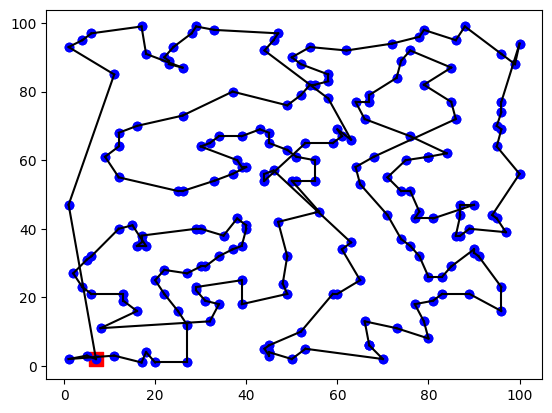

In [24]:
    iterations = 10
    ants = 50
    alpha = 1
    beta = 10
    evaporation = 0.5
    intensification = 0.8

    v = toolbox.generate_cities(200)
    
    t = time.time()
    p = time.process_time()

    
    path, score = aco(v, iterations, ants, evaporation, alpha, beta, intensification)

    print("Path : ", path)
    print("score : ", score)

    print("r1 : ", time.time() - t)
    print("r2 : ", time.process_time() - p)
    
    toolbox.afficher(path, v)

Test de l'algorithme d'optimisation des colonies de fourmis sur plusieurs clusters :

In [18]:
def kcamions(cluster, cities, iterations, ants, evaporation, alpha, beta, intensification, pie):

    if pie:
        cities[0] = [50, 50]
        vmeans = toolbox.pie(cluster, cities)
    else:
        vmeans = toolbox.kmeans(cluster, cities)

    vmeans_sub = toolbox.get_sublists(vmeans)

    best_paths = []
    best_scores = []
    clusters = []

    for v in range(len(vmeans_sub)):

        current_cluster = [cities[i] for i in vmeans_sub[v]]
        current_cluster.insert(0, cities[0])

        clusters.append(current_cluster)

        best_path, best_score = aco(current_cluster, iterations, ants, evaporation, alpha, beta, intensification)

        best_paths.append(best_path)
        best_scores.append(best_score)

    return best_paths, best_scores, clusters

score :  204.96278814771082
score :  208.59218185575787
score :  201.90383011817855
score :  191.74435128849387
score :  216.8706995107998
r1 :  0.7137660980224609
r2 :  0.34375


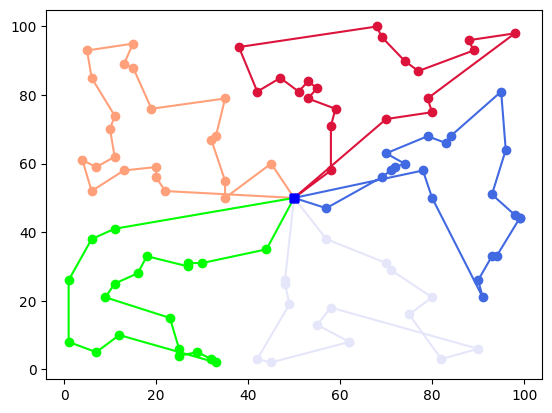

In [23]:
    iterations = 10
    ants = 200
    alpha = 1
    beta = 10
    evaporation = 0.5
    intensification = 0.8

    v = toolbox.generate_cities(100)
    
    t = time.time()
    p = time.process_time()

    
    paths, scores, cluster = kcamions(5, v, iterations, ants, evaporation, alpha, beta, intensification, True)

    for i in range(len(paths)):
#         print("Path : ", paths[i])
        print("score : ", scores[i])
        
    print("r1 : ", time.time() - t)
    print("r2 : ", time.process_time() - p)
    
    toolbox.afficher_kcamions(cluster, paths)

Fonction permettant de diviser la liste des villes en cluster et d'attribuer chaque cluster à une tournée différente, et donc un camion différent.
L'algorithme des fourmis est donc utilisé sur chaque cluster.

#### 3.1) Algorithme du recuit simulé : <a class="anchor" id="recuit-simulé"></a>

In [28]:
import random
import  time
import matplotlib.pyplot as plt

import numpy

import toolbox

def distance_total(path):
    dist=0
    for i in range(len(path) - 1):
        dist += toolbox.euclidean_distance(path[i], path[i + 1])
    return dist


def sa(temperature, cx_regretion, iterations, cities_coords):
    start_timer=time.time()

    best_val = distance_total(cities_coords)

    for i in range(iterations):
        start_iter = time.time()
        start_process_time = time.process_time()
        # Exchange two coordinates and get a new neighbour solution
        c1, c2 = numpy.random.randint(0, len(cities_coords), size=2)
        temp = cities_coords[c1]
        cities_coords[c1] = cities_coords[c2]
        cities_coords[c2] = temp

        # Get the new cost
        evaluate_val = distance_total(cities_coords)
        diff = best_val - evaluate_val
        # calculate metropolis acceptance criterion
        metropolis = numpy.exp((diff / temperature))

        if diff > 0 :
            best_val = evaluate_val

        elif diff < 0 or (numpy.random.uniform()) < metropolis:
            best_val = evaluate_val

        else :
            temp = cities_coords[c1]
            cities_coords[c1] = cities_coords[c2]
            cities_coords[c2] = temp

        temperature = temperature*cx_regretion


    return best_val

Boucle principale de l'algorithme du recuit simulé

Test de l'algorithme du recuit simulé :

504.00700304518364
441.14494178799134


C:\Users\Tanguy\AppData\Local\Temp\ipykernel_18832\40563889.py:34: RuntimeWarning: overflow encountered in exp
  metropolis = numpy.exp((diff / temperature))


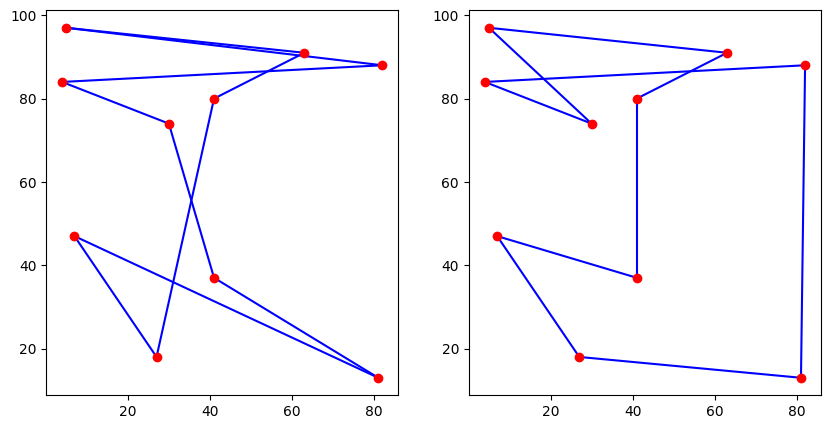

r1 :  0.23239588737487793
r2 :  0.0625


In [30]:
    cities_number = 10
    iterations = 1000
    temperature = 10000
    cxreduction = 0.98
    p = time.process_time()
    t = time.time()
    cities_coords = toolbox.generate_cities(cities_number)

    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    for first, second in zip(cities_coords[:-1], cities_coords[1:]):
        ax1.plot([first[0], second[0]], [first[1], second[1]], 'b')
    ax1.plot([cities_coords[0][0], cities_coords[-1][0]], [cities_coords[0][1], cities_coords[-1][1]], 'b')
    for c in cities_coords:
        ax1.plot(c[0], c[1], 'ro')

    print(distance_total(cities_coords))
    result = sa(temperature, cxreduction, iterations, cities_coords)
    print(result)
    for first, second in zip(cities_coords[:-1], cities_coords[1:]):
        ax2.plot([first[0], second[0]], [first[1], second[1]], 'b')
    ax2.plot([cities_coords[0][0], cities_coords[-1][0]], [cities_coords[0][1], cities_coords[-1][1]], 'b')
    for c in cities_coords:
        ax2.plot(c[0], c[1], 'ro')
    plt.show()
    print("r1 : ", time.time() - t)
    print("r2 : ", time.process_time() - p)
    

#### 3.1) Algorithme de Held-Karp : <a class="anchor" id="held-karp"></a>

In [31]:
import toolbox

In [32]:
def held_karp(cities):
    n = len(cities)
    memo = {}

    def tsp(mask, pos):
        if (mask, pos) in memo:
            return memo[(mask, pos)]

        if mask == (1 << n) - 1:
            return toolbox.euclidean_distance(cities[pos], cities[0]), [pos, 0]

        ans = float('inf')
        path = []
        for nxt in range(n):
            if (mask >> nxt) & 1 == 0:
                cost, subpath = tsp(mask | (1 << nxt), nxt)
                cost += toolbox.euclidean_distance(cities[pos], cities[nxt])
                if cost < ans:
                    ans = cost
                    path = [pos] + subpath

        memo[(mask, pos)] = ans, path
        return ans, path
    return tsp(1, 0)

Path :  [0, 4, 8, 6, 3, 9, 1, 5, 2, 7, 0]
score :  252.4842768529307
r1 :  0.012794971466064453
r2 :  0.0


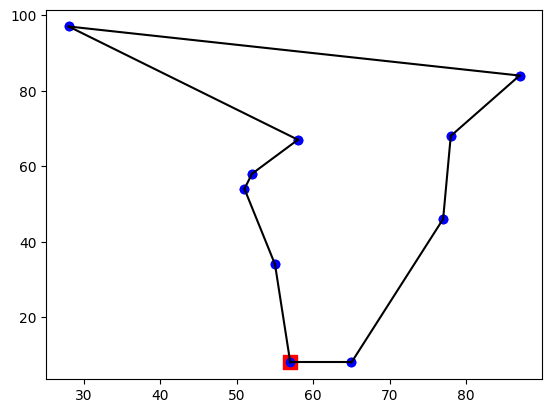

In [34]:
    v = toolbox.generate_cities(10)

    p = time.process_time()
    t = time.time()

    score, path = held_karp(v)

    print("Path : ", path)
    print("score : ", score)

    print("r1 : ", time.time() - t)
    print("r2 : ", time.process_time() - p)

    toolbox.afficher(path, v)

#### ??)Conclusion : <a class="anchor" id="conclusion"></a>
  






#### ??)Bibliographie : <a class="anchor" id="bibliographie"></a>
  


- Problème de tournées de véhicules (VRP). http://soutienintelligence.com/articlesbycategorypretty/cplex/probleme-de-tournees-de-vehicules-vrp



- Martinet Sanchez, C. et Gonnage, R. (2023, 09 mai). Calculez la complexité algorithmique. https://openclassrooms.com/fr/courses/7527306-decouvrez-le-fonctionnement-des-algorithmes/7760669-calculez-la-complexite-algorithmique

- Costanzo, A., Luong, T. et Marill, G.


